# Retail Sales Analysis
Data Analyst project

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('retail_sales_data.csv')

In [12]:
df

,Order_ID,Order_Date,Product,Category,Quantity,Price,Revenue,Profit,Region
0,1,3/13/2019,Apple Watch,Accessories,4,1360,5440,1926.53,North
1,2,4/3/2020,Sony Headphones,Accessories,2,82886,165772,62165.54,West
2,3,10/23/2020,Sony Headphones,Accessories,4,60763,243052,54196.19,North
3,4,7/11/2019,Samsung Galaxy S23,Electronics,4,65425,261700,90787.71,West
4,5,9/10/2019,Sony Headphones,Accessories,1,54207,54207,13393.83,West
...,...,...,...,...,...,...,...,...,...
4995,4996,9/28/2020,iPhone 14,Electronics,5,38307,191535,73202.34,South
4996,4997,6/7/2020,Dell Laptop,Electronics,2,2792,5584,1217.83,South
4997,4998,12/27/2019,iPad,Electronics,4,1780,7120,2712.66,East
4998,4999,4/18/2020,Puma T-shirt,Fashion,3,69050,207150,52515.78,North


# data inspection using head(), info(), and shape()

In [13]:
df.shape

(5000, 9)

In [14]:
df.head(10)

,Order_ID,Order_Date,Product,Category,Quantity,Price,Revenue,Profit,Region
0,1,3/13/2019,Apple Watch,Accessories,4,1360,5440,1926.53,North
1,2,4/3/2020,Sony Headphones,Accessories,2,82886,165772,62165.54,West
2,3,10/23/2020,Sony Headphones,Accessories,4,60763,243052,54196.19,North
3,4,7/11/2019,Samsung Galaxy S23,Electronics,4,65425,261700,90787.71,West
4,5,9/10/2019,Sony Headphones,Accessories,1,54207,54207,13393.83,West
5,6,4/20/2020,Canon Camera,Electronics,1,26158,26158,7848.31,West
6,7,5/19/2020,Dell Laptop,Electronics,4,57386,229544,35393.91,East
7,8,6/16/2019,Sony Headphones,Accessories,3,42106,126318,45142.13,South
8,9,12/12/2019,HP Laptop,Electronics,1,74469,74469,22612.20,North
9,10,5/23/2020,Samsung Galaxy S23,Electronics,4,23983,95932,35445.96,West


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order_ID    5000 non-null   int64  
 1   Order_Date  5000 non-null   object 
 2   Product     5000 non-null   object 
 3   Category    5000 non-null   object 
 4   Quantity    5000 non-null   int64  
 5   Price       5000 non-null   int64  
 6   Revenue     5000 non-null   int64  
 7   Profit      5000 non-null   float64
 8   Region      5000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 351.7+ KB


#
“First, I performed initial data inspection using head(), info(), and shape()”

# Data Cleaning

In [16]:
## I want to check null value and this part is very imp in data cleaning 

pd.isnull(df)   # It show null value in the form of true and false 

,Order_ID,Order_Date,Product,Category,Quantity,Price,Revenue,Profit,Region
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False


In [17]:
## Missing values check

pd.isnull(df).sum()   # It show null value directly in the form of number  

Order_ID      0
Order_Date    0
Product       0
Category      0
Quantity      0
Price         0
Revenue       0
Profit        0
Region        0
dtype: int64

In [29]:
## Handle missing values

df.dropna(inplace=True)  # It is use for remove(drop) null value 

In [30]:
## Date format fix

df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [31]:
## It is use for rename the column

df.rename(columns= {'Price':'money'})

,Order_ID,Order_Date,Product,Category,Quantity,money,Revenue,Profit,Region,Month,Year
0,1,2019-03-13,Apple Watch,Accessories,4,1360,5440,1926.53,North,3,2019
1,2,2020-04-03,Sony Headphones,Accessories,2,82886,165772,62165.54,West,4,2020
2,3,2020-10-23,Sony Headphones,Accessories,4,60763,243052,54196.19,North,10,2020
3,4,2019-07-11,Samsung Galaxy S23,Electronics,4,65425,261700,90787.71,West,7,2019
4,5,2019-09-10,Sony Headphones,Accessories,1,54207,54207,13393.83,West,9,2019
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2020-09-28,iPhone 14,Electronics,5,38307,191535,73202.34,South,9,2020
4996,4997,2020-06-07,Dell Laptop,Electronics,2,2792,5584,1217.83,South,6,2020
4997,4998,2019-12-27,iPad,Electronics,4,1780,7120,2712.66,East,12,2019
4998,4999,2020-04-18,Puma T-shirt,Fashion,3,69050,207150,52515.78,North,4,2020


# 
“I handled missing values and converted date columns into proper datetime format.”

# Feature Engineering

In [32]:
## Month & Year column

df['Month'] = df['Order_Date'].dt.month
df['Year'] = df['Order_Date'].dt.year

# Exploratory Data Analysis (EDA)

In [33]:
# 1. Total Revenue

total_revenue = df['Revenue'].sum()
total_revenue

np.int64(659591995)

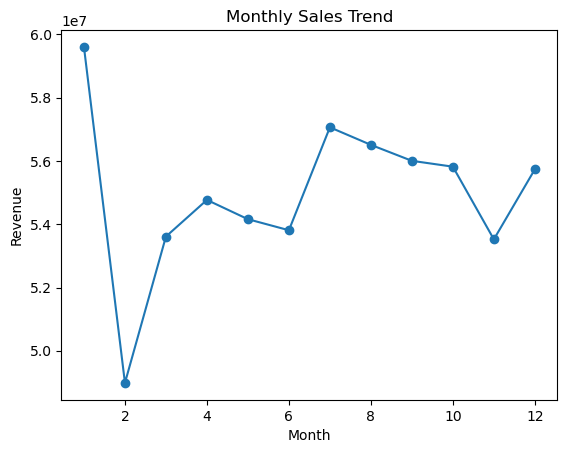

In [34]:
# 2. Monthly Sales Trend

monthly_sales = df.groupby('Month')['Revenue'].sum()

monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


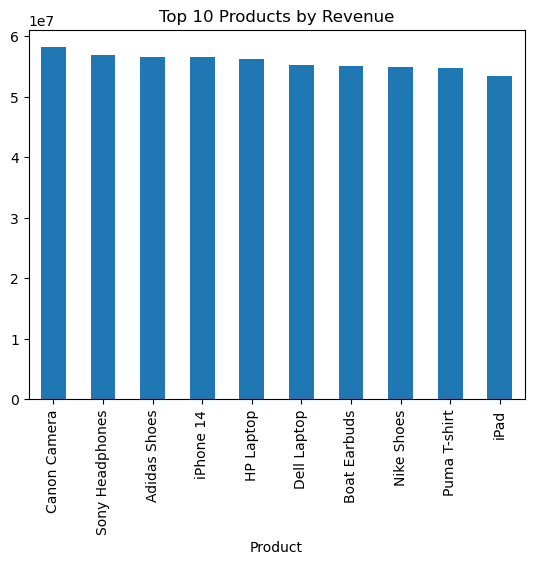

In [35]:
# 3. Top 10 Products

top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.show()


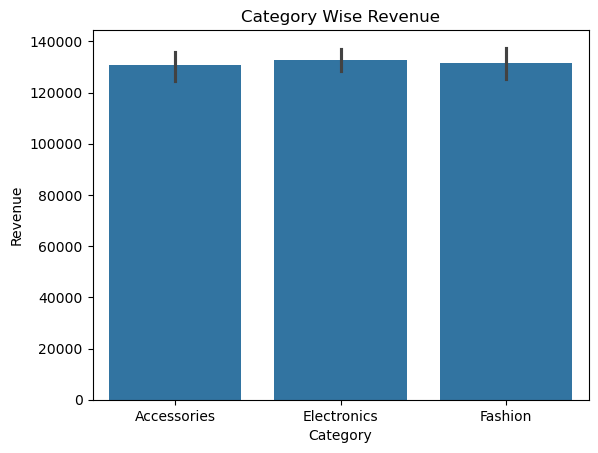

In [36]:
# Category-wise Sales

sns.barplot(x=df['Category'], y=df['Revenue'])
plt.title("Category Wise Revenue")
plt.show()


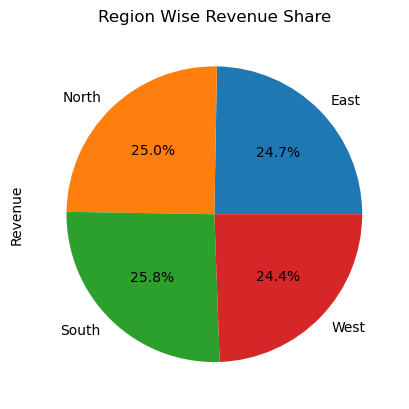

In [37]:
# Region-wise Analysis

region_sales = df.groupby('Region')['Revenue'].sum()

region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Region Wise Revenue Share")
plt.show()


# Profit Analysis (ADVANCED) 

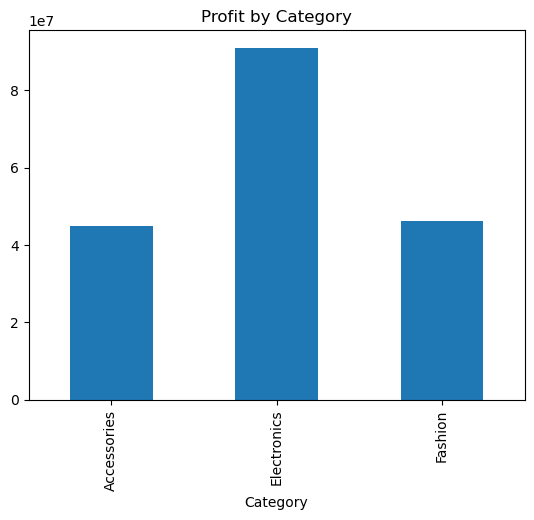

In [38]:
profit_by_category = df.groupby('Category')['Profit'].sum()

profit_by_category.plot(kind='bar')
plt.title("Profit by Category")
plt.show()


#
“I analyzed profit instead of only revenue to identify truly profitable categories.”